## **Summary Statistics by Country**

In [1]:
import pandas as pd

file_path = "/content/statistical_indicators_join.csv"
df_stat = pd.read_csv(file_path)

df_stat.head()


,country_code,year,BroadMoney_Ratio,Classification_HouseholdConsumption,Classification_NationalIndustry,Classification_StatusofEmployment,GovernmentFinance_Stats,MonetaryandFinancial_Stats,OfficialExchangeRate,country_name,Region
0,ABW,2019,2.59873504,..,..,..,..,..,1.79,Aruba,Latin America and the Caribbean
1,ABW,2020,2.21025793,..,..,..,..,..,1.79,Aruba,Latin America and the Caribbean
2,ABW,2021,1.981206032,..,..,..,..,..,1.79,Aruba,Latin America and the Caribbean
3,ABW,2022,2.005967712,..,..,..,..,..,1.79,Aruba,Latin America and the Caribbean
4,ABW,2023,2.126148351,..,..,..,..,..,1.79,Aruba,Latin America and the Caribbean


**Check the data types and missing values**

**Some classification indicators have 147 missing values**

In [2]:
missing_values = df_stat.isnull().sum()

data_types = df_stat.dtypes

print("Missing Values per Column:")
print(missing_values)

print("Data Types per Column:")
print(data_types)


Missing Values per Column:
country_code                             0
year                                     0
BroadMoney_Ratio                         0
Classification_HouseholdConsumption    245
Classification_NationalIndustry        245
Classification_StatusofEmployment      245
GovernmentFinance_Stats                245
MonetaryandFinancial_Stats             245
OfficialExchangeRate                     0
country_name                             0
Region                                   0
dtype: int64
Data Types per Column:
country_code                           object
year                                    int64
BroadMoney_Ratio                       object
Classification_HouseholdConsumption    object
Classification_NationalIndustry        object
Classification_StatusofEmployment      object
GovernmentFinance_Stats                object
MonetaryandFinancial_Stats             object
OfficialExchangeRate                   object
country_name                           object
Regi

In [3]:
numeric_cols = df_stat.select_dtypes(include=['float64', 'int64']).columns
df_stat[numeric_cols].describe()


,year
count,1330.000000
mean,2021.000000
std,1.414746
min,2019.000000
25%,2020.000000
50%,2021.000000
75%,2022.000000
max,2023.000000


## **Preprocessing for Indicators: Classification and Government Finance Stats**

**Remove 147 rows with missing values**

In [5]:
df_stat_cleaned = df_stat.dropna()

df_stat_cleaned.reset_index(drop=True, inplace=True)

print(f"Removed {df_stat.shape[0] - df_stat_cleaned.shape[0]} rows with missing values.")
print(f"New dataset now has {df_stat_cleaned.shape[0]} rows.")


Removed 245 rows with missing values.
New dataset now has 1085 rows.


In [7]:
# To see data types for all columns
print("Data types for all columns:")
print(df_stat_cleaned.dtypes)

# To see data types for just numeric columns
print("\nData types for numeric columns:")
print(df_stat_cleaned[numeric_cols].dtypes)

Data types for all columns:
country_code                           object
year                                    int64
BroadMoney_Ratio                       object
Classification_HouseholdConsumption    object
Classification_NationalIndustry        object
Classification_StatusofEmployment      object
GovernmentFinance_Stats                object
MonetaryandFinancial_Stats             object
OfficialExchangeRate                   object
country_name                           object
Region                                 object
dtype: object

Data types for numeric columns:
year    int64
dtype: object


In [8]:
# List all columns that should be numeric (except 'year' which is already int64)
columns_to_convert = [
    'BroadMoney_Ratio',
    'Classification_HouseholdConsumption',
    'Classification_NationalIndustry',
    'Classification_StatusofEmployment',
    'GovernmentFinance_Stats',
    'MonetaryandFinancial_Stats',
    'OfficialExchangeRate'
]

# Convert columns to numeric, errors='coerce' will convert non-convertible values to NaN
for col in columns_to_convert:
    df_stat_cleaned[col] = pd.to_numeric(df_stat_cleaned[col], errors='coerce')

# Check the data types again
print("Updated data types:")
print(df_stat_cleaned.dtypes)

# Now get your numeric columns again
numeric_cols = df_stat_cleaned.select_dtypes(include=['float64', 'int64']).columns
print("\nUpdated numerical columns:")
print(numeric_cols.tolist())

Updated data types:
country_code                            object
year                                     int64
BroadMoney_Ratio                       float64
Classification_HouseholdConsumption    float64
Classification_NationalIndustry        float64
Classification_StatusofEmployment      float64
GovernmentFinance_Stats                float64
MonetaryandFinancial_Stats             float64
OfficialExchangeRate                   float64
country_name                            object
Region                                  object
dtype: object

Updated numerical columns:
['year', 'BroadMoney_Ratio', 'Classification_HouseholdConsumption', 'Classification_NationalIndustry', 'Classification_StatusofEmployment', 'GovernmentFinance_Stats', 'MonetaryandFinancial_Stats', 'OfficialExchangeRate']


<ipython-input-8-76c93ca0f948>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stat_cleaned[col] = pd.to_numeric(df_stat_cleaned[col], errors='coerce')


In [9]:
numeric_cols = df_stat_cleaned.select_dtypes(include=['float64', 'int64']).columns

print("Numerical Columns in Statistical Indicators Table:")
print(numeric_cols.tolist())


Numerical Columns in Statistical Indicators Table:
['year', 'BroadMoney_Ratio', 'Classification_HouseholdConsumption', 'Classification_NationalIndustry', 'Classification_StatusofEmployment', 'GovernmentFinance_Stats', 'MonetaryandFinancial_Stats', 'OfficialExchangeRate']


In [11]:
import numpy as np

def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]

    return outliers[["country_name", "Region", column]]

outlier_results = {}

for col in numeric_cols:
    outliers = detect_outliers_iqr(df_stat_cleaned, col)
    if not outliers.empty:
        outlier_results[col] = outliers

for col, data in outlier_results.items():
    print(f"Outliers in '{col}':")
    display(data)


Outliers in 'BroadMoney_Ratio':


,country_name,Region,BroadMoney_Ratio
34,Argentina,Latin America and the Caribbean,10.079877
50,Australia,East Asia and Pacific,29.523676
51,Australia,East Asia and Pacific,42.877430
52,Australia,East Asia and Pacific,37.442200
53,Australia,East Asia and Pacific,40.069119
...,...,...,...
1019,United States,North America,35.528874
1080,Zimbabwe,Sub-Saharan Africa,28.064655
1081,Zimbabwe,Sub-Saharan Africa,119.612929
1083,Zimbabwe,Sub-Saharan Africa,10.307738


Outliers in 'Classification_HouseholdConsumption':


,country_name,Region,Classification_HouseholdConsumption
21,Andorra,Europe and Central Asia,0.0
22,Andorra,Europe and Central Asia,0.0
23,Andorra,Europe and Central Asia,0.0
24,Andorra,Europe and Central Asia,0.0
45,Antigua and Barbuda,Latin America and the Caribbean,0.0
...,...,...,...
1050,Vanuatu,East Asia and Pacific,0.0
1051,Vanuatu,East Asia and Pacific,0.0
1067,"Yemen, Rep.",Middle East and North Africa,0.0
1068,"Yemen, Rep.",Middle East and North Africa,0.0


Outliers in 'MonetaryandFinancial_Stats':


,country_name,Region,MonetaryandFinancial_Stats
21,Andorra,Europe and Central Asia,0.0
22,Andorra,Europe and Central Asia,0.0
23,Andorra,Europe and Central Asia,0.0
24,Andorra,Europe and Central Asia,0.0
30,Argentina,Latin America and the Caribbean,0.0
...,...,...,...
1065,"Yemen, Rep.",Middle East and North Africa,0.0
1066,"Yemen, Rep.",Middle East and North Africa,0.0
1067,"Yemen, Rep.",Middle East and North Africa,0.0
1068,"Yemen, Rep.",Middle East and North Africa,0.0


Outliers in 'OfficialExchangeRate':


,country_name,Region,OfficialExchangeRate
10,Angola,Sub-Saharan Africa,364.825805
11,Angola,Sub-Saharan Africa,578.258780
12,Angola,Sub-Saharan Africa,631.441955
13,Angola,Sub-Saharan Africa,460.567512
14,Angola,Sub-Saharan Africa,685.020238
...,...,...,...
1067,"Yemen, Rep.",Middle East and North Africa,1028.107754
1068,"Yemen, Rep.",Middle East and North Africa,1115.002387
1069,"Yemen, Rep.",Middle East and North Africa,1355.116379
1083,Zimbabwe,Sub-Saharan Africa,374.954363


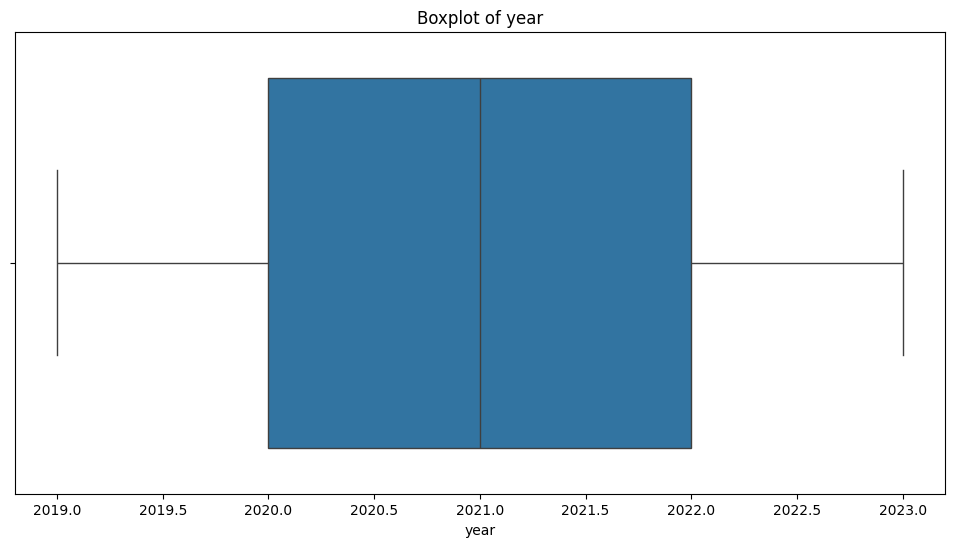

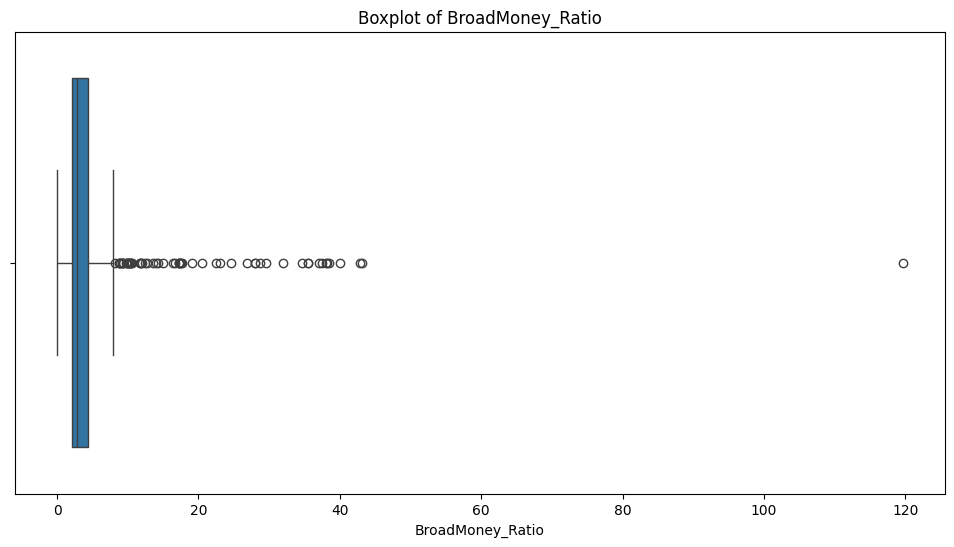

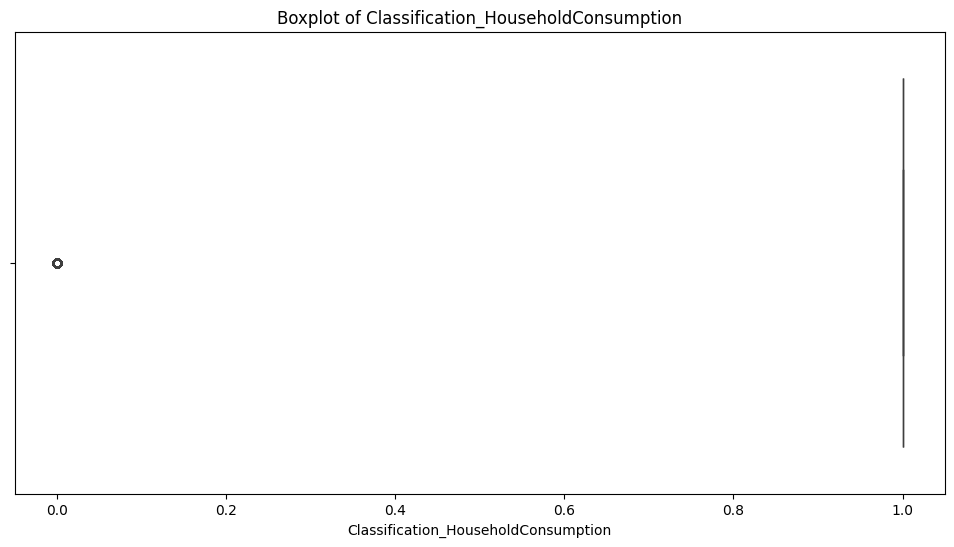

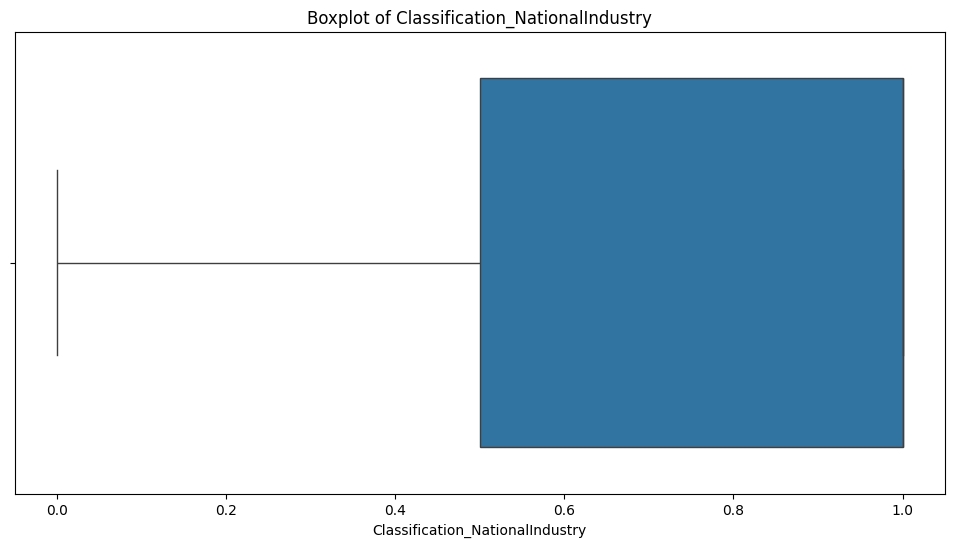

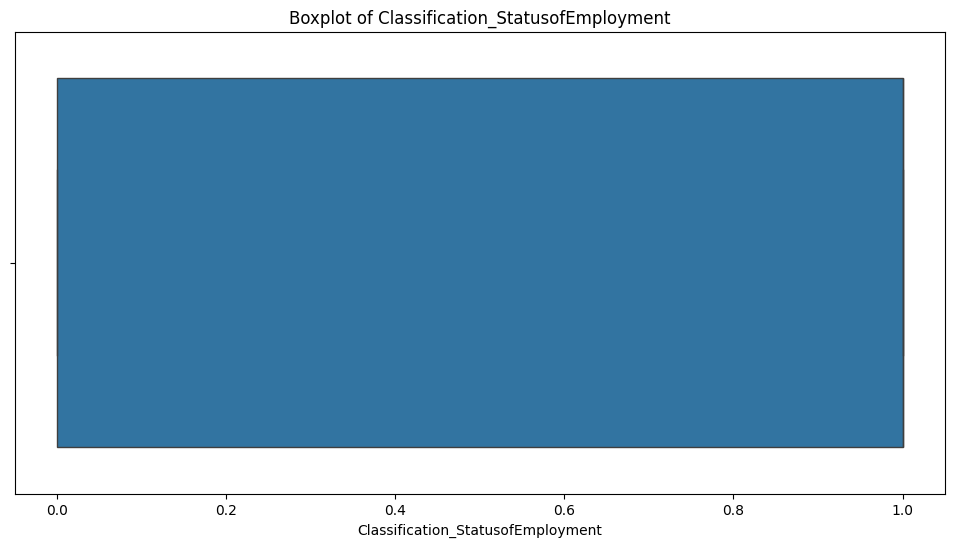

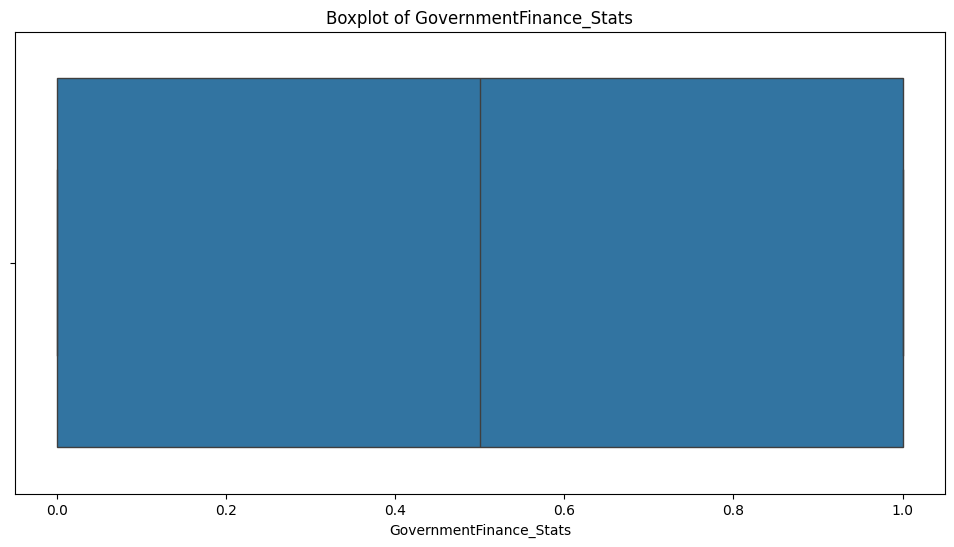

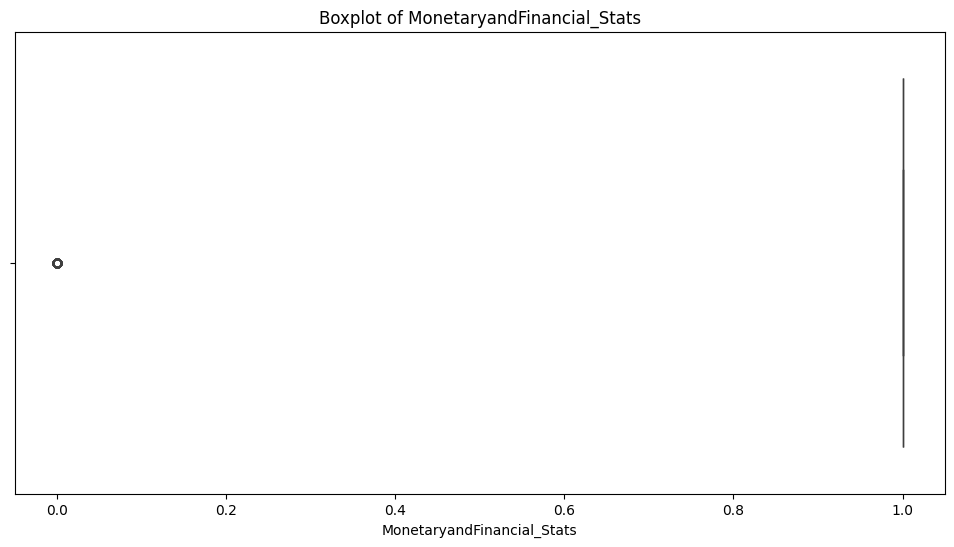

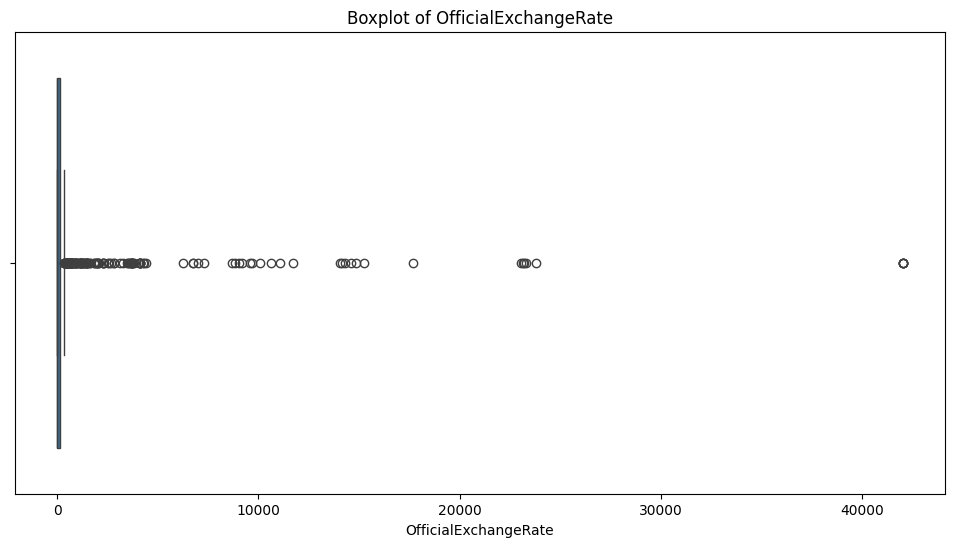

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_boxplot(data, column, title):
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=data[column])
    plt.title(title)
    plt.show()

for col in numeric_cols:
    plot_boxplot(df_stat_cleaned, col, f"Boxplot of {col}")


**The box plots above lead us to believe there are binary columns, so we'll check for unique values in the suspected columns**

In [13]:
binary_columns = [
    "Classification_HouseholdConsumption",
    "Classification_NationalIndustry",
    "Classification_StatusofEmployment",
    "GovernmentFinance_Stats",
    "MonetaryandFinancial_Stats"
]

for col in binary_columns:
    unique_vals = df_stat_cleaned[col].unique()
    print(f"Unique values in '{col}': {unique_vals}")


Unique values in 'Classification_HouseholdConsumption': [nan  1.  0.]
Unique values in 'Classification_NationalIndustry': [nan 0.  1.  0.5]
Unique values in 'Classification_StatusofEmployment': [nan  0.  1.]
Unique values in 'GovernmentFinance_Stats': [nan 0.5 0.  1. ]
Unique values in 'MonetaryandFinancial_Stats': [nan  1.  0.]


## **Preprocessing for Indicators: BroadMoney_Ratio and OfficialExchangeRate**

In [14]:
# Summary statistics for Broad Money Ratio & Official Exchange Rate
df_stat_cleaned[["BroadMoney_Ratio", "OfficialExchangeRate"]].describe()


,BroadMoney_Ratio,OfficialExchangeRate
count,613.000000,1024.000000
mean,4.795419,799.642236
std,7.663839,3724.677031
min,0.001457,0.301643
25%,2.061763,1.320484
50%,2.853480,9.259927
75%,4.409932,141.275678
max,119.612929,42000.000000


In [15]:
outliers_broadmoney = detect_outliers_iqr(df_stat_cleaned, "BroadMoney_Ratio")
outliers_exchange = detect_outliers_iqr(df_stat_cleaned, "OfficialExchangeRate")

print("Outliers in Broad Money Ratio:")
display(outliers_broadmoney)

print("Outliers in Official Exchange Rate:")
display(outliers_exchange)


Outliers in Broad Money Ratio:


,country_name,Region,BroadMoney_Ratio
34,Argentina,Latin America and the Caribbean,10.079877
50,Australia,East Asia and Pacific,29.523676
51,Australia,East Asia and Pacific,42.877430
52,Australia,East Asia and Pacific,37.442200
53,Australia,East Asia and Pacific,40.069119
...,...,...,...
1019,United States,North America,35.528874
1080,Zimbabwe,Sub-Saharan Africa,28.064655
1081,Zimbabwe,Sub-Saharan Africa,119.612929
1083,Zimbabwe,Sub-Saharan Africa,10.307738


Outliers in Official Exchange Rate:


,country_name,Region,OfficialExchangeRate
10,Angola,Sub-Saharan Africa,364.825805
11,Angola,Sub-Saharan Africa,578.258780
12,Angola,Sub-Saharan Africa,631.441955
13,Angola,Sub-Saharan Africa,460.567512
14,Angola,Sub-Saharan Africa,685.020238
...,...,...,...
1067,"Yemen, Rep.",Middle East and North Africa,1028.107754
1068,"Yemen, Rep.",Middle East and North Africa,1115.002387
1069,"Yemen, Rep.",Middle East and North Africa,1355.116379
1083,Zimbabwe,Sub-Saharan Africa,374.954363


**Both columns have many outliers, as indicated by the boxplots below. Next, we will handle these values by capping extreme values**

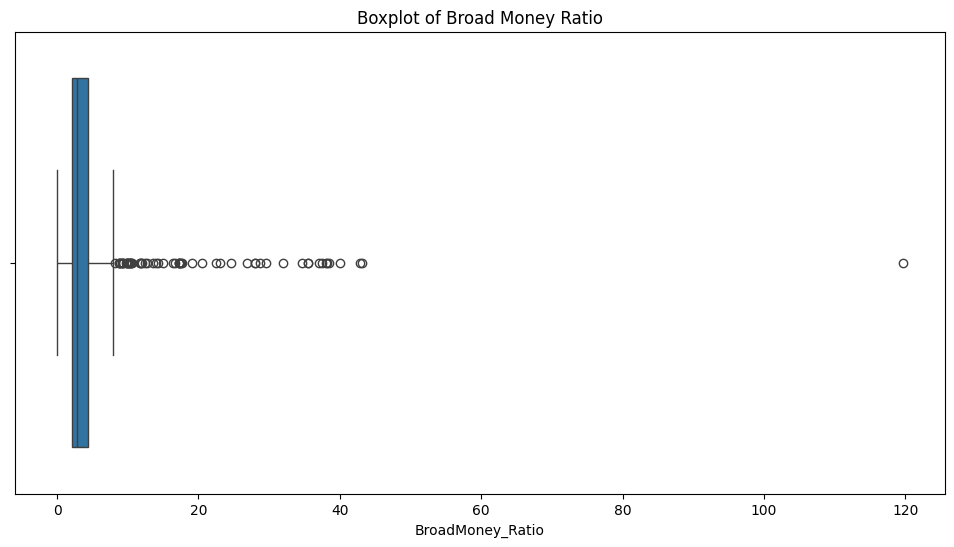

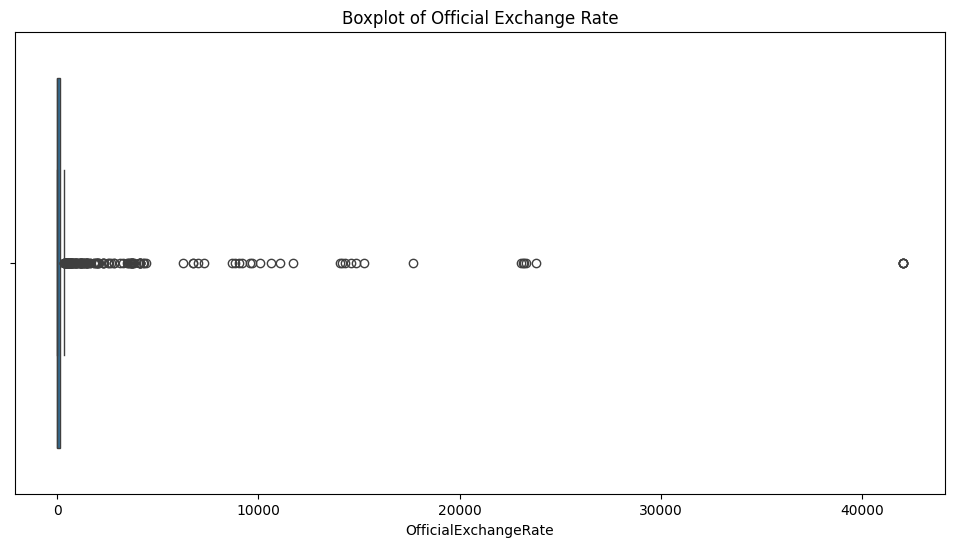

In [16]:
def plot_boxplot(data, column, title):
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=data[column])
    plt.title(title)
    plt.show()

plot_boxplot(df_stat_cleaned, "BroadMoney_Ratio", "Boxplot of Broad Money Ratio")
plot_boxplot(df_stat_cleaned, "OfficialExchangeRate", "Boxplot of Official Exchange Rate")


**We don't want to remove/transform an excessive amount of the total data, so we will cap extreme values at the 95th percentile to keep data realistic without removing too much data**

In [17]:
# Calculate the 95th percentile for both indicators
broadmoney_cap = df_stat_cleaned["BroadMoney_Ratio"].quantile(0.95)
exchange_cap = df_stat_cleaned["OfficialExchangeRate"].quantile(0.95)

df_stat_cleaned["BroadMoney_Ratio"] = df_stat_cleaned["BroadMoney_Ratio"].clip(upper=broadmoney_cap)
df_stat_cleaned["OfficialExchangeRate"] = df_stat_cleaned["OfficialExchangeRate"].clip(upper=exchange_cap)

print(f"Broad Money Ratio capped at: {broadmoney_cap}")
print(f"Official Exchange Rate capped at: {exchange_cap}")


Broad Money Ratio capped at: 15.56296148599997
Official Exchange Rate capped at: 3502.656867399996


<ipython-input-17-f02f21f30c80>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stat_cleaned["BroadMoney_Ratio"] = df_stat_cleaned["BroadMoney_Ratio"].clip(upper=broadmoney_cap)
<ipython-input-17-f02f21f30c80>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stat_cleaned["OfficialExchangeRate"] = df_stat_cleaned["OfficialExchangeRate"].clip(upper=exchange_cap)


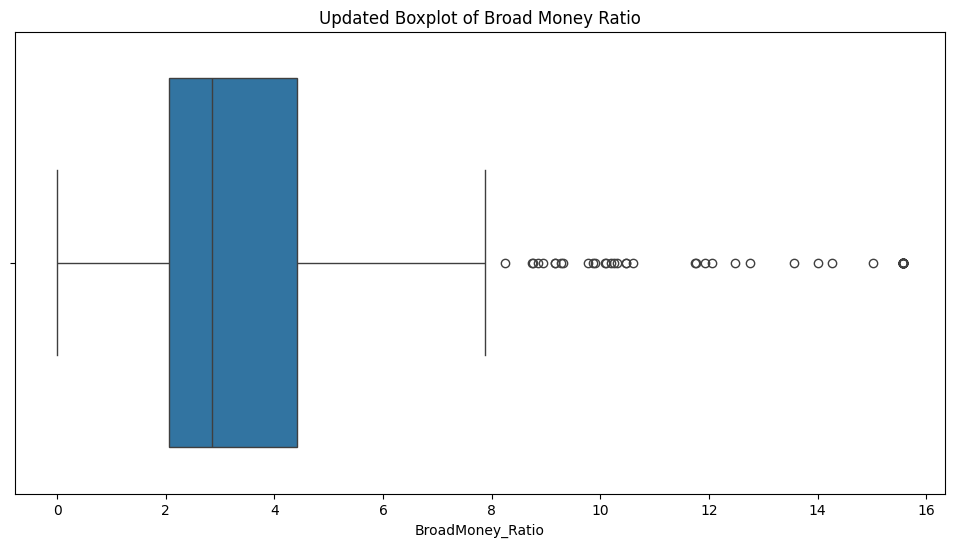

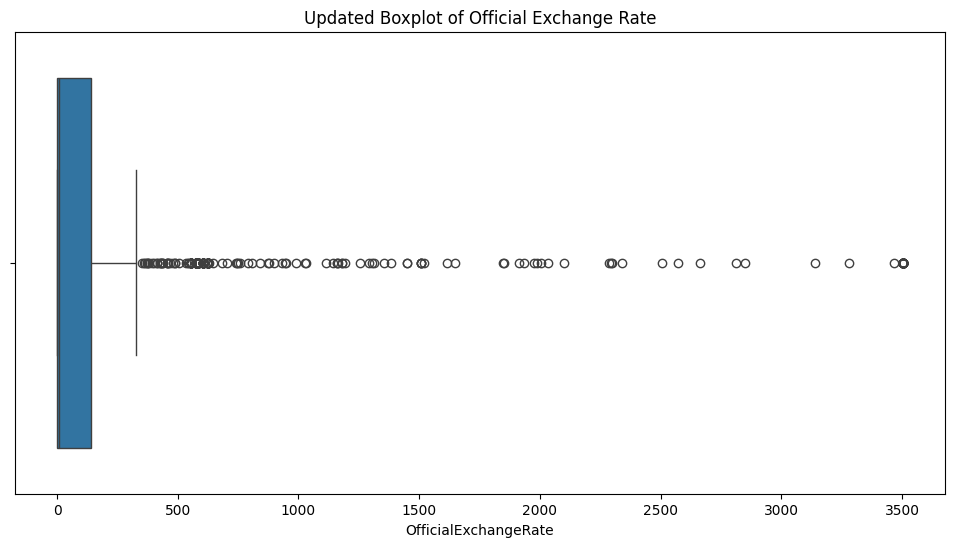

In [18]:
plot_boxplot(df_stat_cleaned, "BroadMoney_Ratio", "Updated Boxplot of Broad Money Ratio")
plot_boxplot(df_stat_cleaned, "OfficialExchangeRate", "Updated Boxplot of Official Exchange Rate")


## **Final Summary Statistics Post-Cleaning: Statistical_Indicators Table**

In [19]:
summary_stats_stat = df_stat_cleaned.describe()

print("Summary Statistics for Cleaned Statistical Indicators Data:")
display(summary_stats_stat)


Summary Statistics for Cleaned Statistical Indicators Data:


,year,BroadMoney_Ratio,Classification_HouseholdConsumption,Classification_NationalIndustry,Classification_StatusofEmployment,GovernmentFinance_Stats,MonetaryandFinancial_Stats,OfficialExchangeRate
count,1085.000000,613.000000,960.000000,954.000000,954.000000,954.000000,962.000000,1024.000000
mean,2021.000000,4.015040,0.818750,0.681342,0.632075,0.414570,0.880457,350.536730
std,1.414866,3.471408,0.385426,0.370938,0.482494,0.440342,0.324595,843.165711
min,2019.000000,0.001457,0.000000,0.000000,0.000000,0.000000,0.000000,0.301643
25%,2020.000000,2.061763,1.000000,0.500000,0.000000,0.000000,1.000000,1.320484
50%,2021.000000,2.853480,1.000000,1.000000,1.000000,0.500000,1.000000,9.259927
75%,2022.000000,4.409932,1.000000,1.000000,1.000000,1.000000,1.000000,141.275678
max,2023.000000,15.562961,1.000000,1.000000,1.000000,1.000000,1.000000,3502.656867


##**Export cleaned table to .csv**

In [20]:
export_path = "/content/cleaned_statistical_indicators.csv"

df_stat_cleaned.to_csv(export_path, index=False)

print(f"Cleaned dataset saved as: {export_path}")

Cleaned dataset saved as: /content/cleaned_statistical_indicators.csv


In [ ]:
!jupyter nbconvert --to html "/content/BANA698_Statistical_Preprocessing.ipynb"


[NbConvertApp] Converting notebook /content/BANA698_Statistical_Preprocessing.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 12 image(s).
[NbConvertApp] Writing 686373 bytes to /content/BANA698_Statistical_Preprocessing.html
